# Default Payments of Credit Card Clients (Predictive Analysis)

# Libraries used

In [1]:
# load libraries and set styles, options
import os,csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
%matplotlib inline

# Dataset description

In [3]:
#ID: ID of each client
##LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
#SEX: Gender (1=male, 2=female)
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
#AGE: Age in years
#PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
#PAY_2: Repayment status in August, 2005 (scale same as above)
#PAY_3: Repayment status in July, 2005 (scale same as above)
#PAY_4: Repayment status in June, 2005 (scale same as above)
#PAY_5: Repayment status in May, 2005 (scale same as above)
#PAY_6: Repayment status in April, 2005 (scale same as above)
#BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
#BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
#BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
#BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
#BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
#BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
#PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
#PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
#PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
#PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
#PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
#PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
#default.payment.next.month: Default payment (1=yes, 0=no)
df = pd.read_csv("C:/Users/mrferozi/Desktop/Datra Jokes/big/credit/credit_Risk.csv")

In [4]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Risk
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,50050.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,10000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Risk
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167466.324333,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129737.829168,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Risk         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
Risk         30000 non-null int64
dtypes: float64

In [8]:
print ("Risk")
print (df[df.Risk == 1].describe())
print ()
print ("Normal")
print (df[df.Risk == 0].describe())

Risk
                 ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   6636.000000    6636.000000  6636.000000  6636.000000  6636.000000   
mean   14773.781947  130109.656420     1.567058     1.894665     1.528029   
std     8571.616622  115378.540571     0.495520     0.728096     0.525433   
min        1.000000   10000.000000     1.000000     1.000000     0.000000   
25%     7408.500000   50000.000000     1.000000     1.000000     1.000000   
50%    14758.500000   90000.000000     2.000000     2.000000     2.000000   
75%    21831.750000  200000.000000     2.000000     2.000000     2.000000   
max    30000.000000  740000.000000     2.000000     6.000000     3.000000   

               AGE        PAY_0        PAY_2        PAY_3        PAY_4  \
count  6636.000000  6636.000000  6636.000000  6636.000000  6636.000000   
mean     35.725738     0.668174     0.458258     0.362116     0.254521   
std       9.693438     1.383252     1.502243     1.499401     1.508535   
min  

# Visualisation

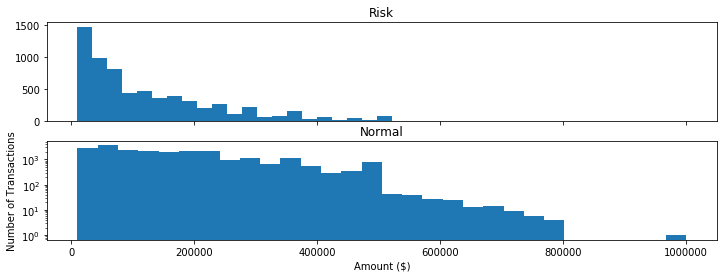

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.LIMIT_BAL[df.Risk == 1], bins = bins)
ax1.set_title('Risk')

ax2.hist(df.LIMIT_BAL[df.Risk == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

# Risk by AGE

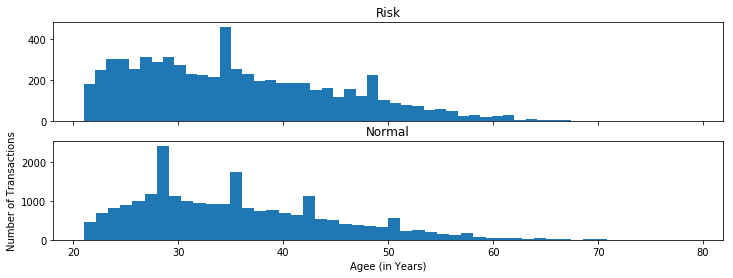

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.AGE[df.Risk == 1], bins = bins)
ax1.set_title('Risk')

ax2.hist(df.AGE[df.Risk == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Agee (in Years)')
plt.ylabel('Number of Transactions')
plt.show()

Higher risk found in age between 30 year and 40 year old

# Risk by Gender

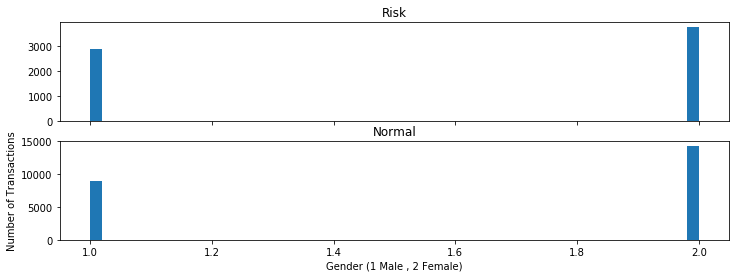

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.SEX[df.Risk == 1], bins = bins)
ax1.set_title('Risk')

ax2.hist(df.SEX[df.Risk == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Gender (1 Male , 2 Female)')
plt.ylabel('Number of Transactions')
plt.show()

Females are more risky to payback credit card loan

# Risk by EDUCATION

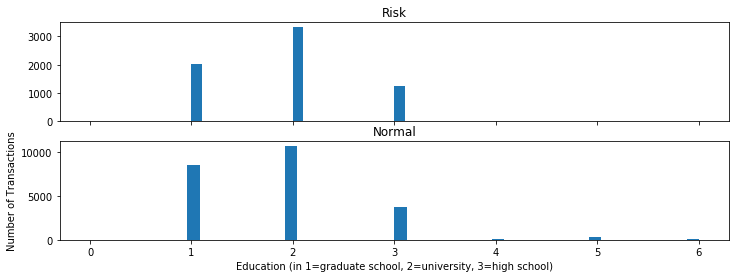

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.EDUCATION[df.Risk == 1], bins = bins)
ax1.set_title('Risk')

ax2.hist(df.EDUCATION[df.Risk == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Education (in 1=graduate school, 2=university, 3=high school)')
plt.ylabel('Number of Transactions')
plt.show()

Risk fall between education level 1=graduate school, 2=university, 3=high school, but higher risk found in University level educated people

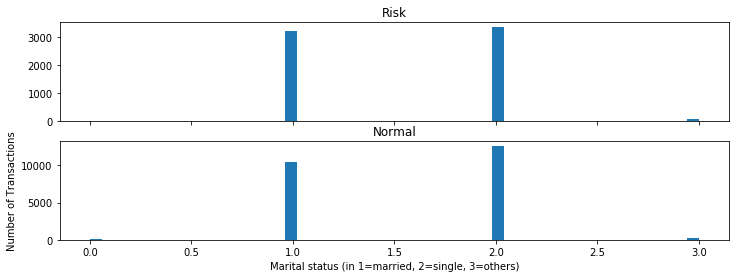

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.MARRIAGE[df.Risk == 1], bins = bins)
ax1.set_title('Risk')

ax2.hist(df.MARRIAGE[df.Risk == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Marital status (in 1=married, 2=single, 3=others)')
plt.ylabel('Number of Transactions')
plt.show()


The risk between married and single peole is similar but single people more vigilant risk

In [14]:
df.index

RangeIndex(start=0, stop=30000, step=1)

# Credit card clients in Taiwan from April 2005 to September 2005

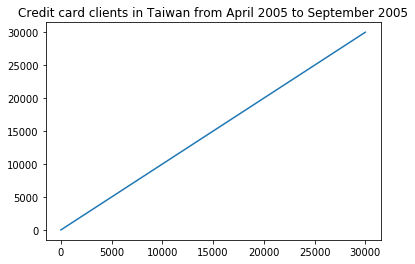

In [15]:
a = df['ID'].plot(title='Credit card clients in Taiwan from April 2005 to September 2005')

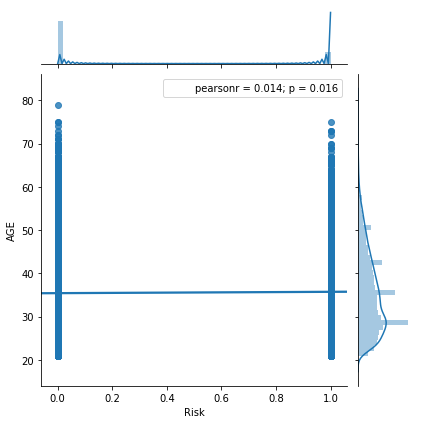

In [16]:
sns.jointplot(x="Risk", y="AGE", data=df, kind="reg");

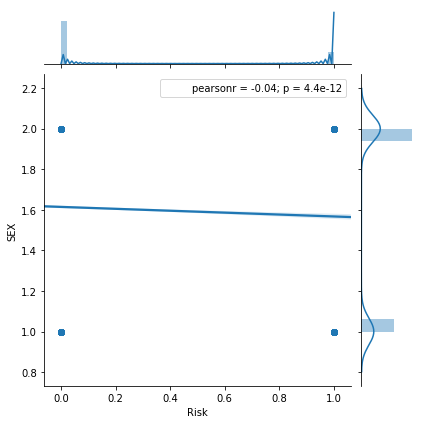

In [17]:
sns.jointplot(x="Risk", y="SEX", data=df, kind="reg");

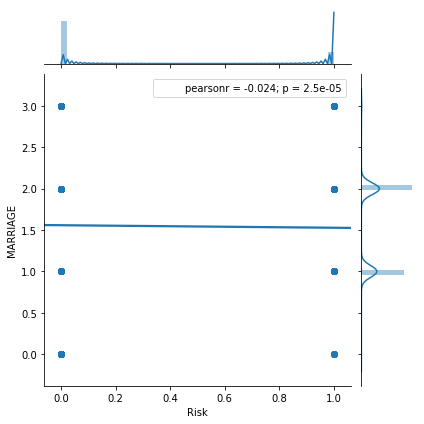

In [18]:
sns.jointplot(x="Risk", y="MARRIAGE", data=df, kind="reg");

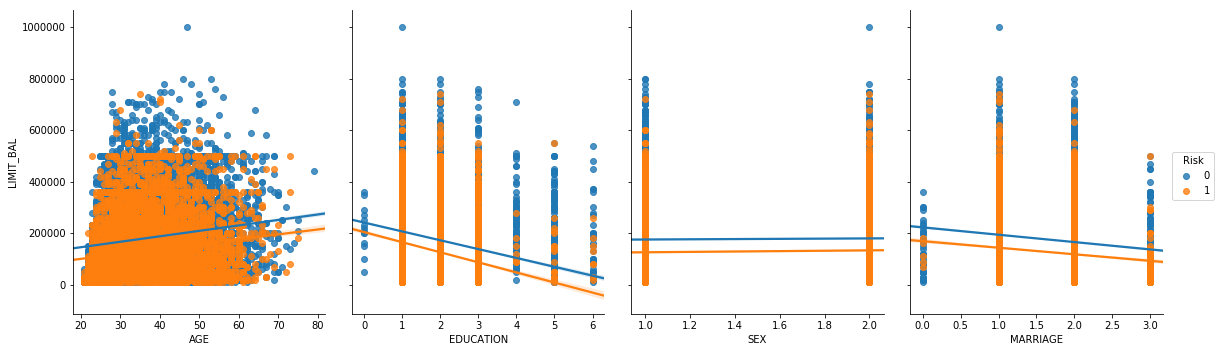

In [19]:
sns.pairplot(df, x_vars=["AGE", "EDUCATION","SEX", "MARRIAGE"], y_vars=["LIMIT_BAL"],
             hue="Risk", size=5, aspect=.8, kind="reg");

# Evaluating a classification model

## Classification accuracy

In [26]:
import os,csv,io,mapsplotlib,time,zipfile,requests,warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np
from IPython.display import HTML
import warnings; warnings.simplefilter('ignore')

In [27]:
# display plots in the notebook
%matplotlib inline

In [28]:
df = pd.read_csv("C:/Users/mrferozi/Desktop/Datra Jokes/big/credit/credit_Risk.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
Risk         30000 non-null int64
dtypes: float64

**Question:** Could we predict the Risk of a Loan Default by given Credit Card Clients dataset?

In [34]:
# define X and y
feature_cols = ["AGE", "EDUCATION","SEX", "MARRIAGE", "LIMIT_BAL"]
y = df.Risk
X = df[feature_cols]

In [35]:
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
y_pred_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Classification accuracy:** percentage of correct predictions

In [38]:
# calculate accuracy
from sklearn import metrics
a =metrics.accuracy_score(y_test, y_pred_class)
print(metrics.accuracy_score(y_test, y_pred_class)*100)

77.75999999999999


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [39]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    5832
1    1668
Name: Risk, dtype: int64

In [40]:
# calculate the percentage of ones
y_test.mean()

0.2224

In [41]:
# calculate the percentage of zeros
1 - y_test.mean()

0.7776000000000001

In [42]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)*100

0    77.76
Name: Risk, dtype: float64

Comparing the **true** and **predicted** response values

In [43]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Classification accuracy:** percentage of correct predictions

In [44]:
# calculate accuracy
from sklearn import metrics
a =metrics.accuracy_score(y_test, y_pred_class)
print((metrics.accuracy_score(y_test, y_pred_class))*100)

77.75999999999999


Classification accuracy or percentage of correct predictions is ***77.76*** Percent is  Alright. 

**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

# Confusion matrix

Table that describes the performance of a classification model

In [45]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[5832    0]
 [1668    0]]


- The bottom right is called the true positive. It is indicate that 0 cases the classifier identified correctly predicted the Risk number (loan data set).

- Upper left is called true negative in 5832 cases the classifier correctly predicted.

- The upper right is called false positive indicate the 0 cases the classifier incorrectly predicted .

- The bottom left is called the false negative which indicated from the 0 cases the classifier predicted incorrectly.

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* fall between Risk=1 and Normal=0
- **True Negatives (TN):** we *correctly* predicted that they *don't* fall between Risk=1 and Normal=0
- **False Positives (FP):** we *incorrectly* predicted that they *do* fall between Risk=1 and Normal=0 (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have fall between Risk=1 and Normal=0) (a "Type II error")

In [46]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [47]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)

In [48]:
confusion

array([[5832,    0],
       [1668,    0]], dtype=int64)

Where 1 represent positive and 0 present negative.

In [49]:
#Where 1 represent positive and 0 present negative.
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [50]:
print (((TP + TN) / float(TP + TN + FP + FN))*100,' ','Percent')
print ((metrics.accuracy_score(y_test, y_pred_class))*100,' ','Percent')

77.75999999999999   Percent
77.75999999999999   Percent


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [51]:
Sensitivity =((TP / float(TP + FN))*100)
print ((TP / float(TP + FN))*100,' ','Percent')

0.0   Percent


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [52]:
specificity=((TN / float(TN + FP))*100)
print((TN / float(TN + FP))*100,' ','Percent')

100.0   Percent


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [53]:
print((TP / float(TP + FP))*100,' ','Percent')

nan   Percent


**Conclusion:**

- Confusion matrix gives us a **more complete picture** of how our classifier is performing
- Also allows us to compute various **classification metrics**, and these metrics can guide model model selection

## Adjusting the classification threshold

In [54]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.85816799, 0.14183201],
       [0.68826045, 0.31173955],
       [0.65484669, 0.34515331],
       [0.75641265, 0.24358735],
       [0.8402838 , 0.1597162 ],
       [0.74131091, 0.25868909],
       [0.77634423, 0.22365577],
       [0.76855815, 0.23144185],
       [0.60457361, 0.39542639],
       [0.82108789, 0.17891211]])

In [56]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.14183201, 0.31173955, 0.34515331, 0.24358735, 0.1597162 ,
       0.25868909, 0.22365577, 0.23144185, 0.39542639, 0.17891211])

In [57]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [58]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0,0.5,'Frequency')

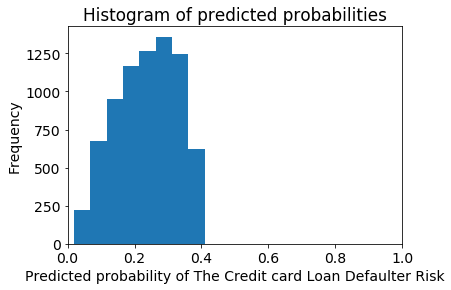

In [59]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of The Credit card Loan Defaulter Risk')
plt.ylabel('Frequency')

Histogram show us the distribution of numerical variable we can see the height of the third bar for example 1400 percent of the observations had values between 0.3 and 0.4 given the 0.5 classification threshold as above mention we can see from the histogram the risk is rarely predicted. Since only the small minority of the testing set observation had a predicted probability above the threshold. For better specificity and sensitivity, we will adjust the threshold from 0.5 to 0.3.

**Decrease the threshold** for predicting to station in order to **increase the sensitivity** of the classifier

In [60]:
# predict risk if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.4)[0]

In [61]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.14183201, 0.31173955, 0.34515331, 0.24358735, 0.1597162 ,
       0.25868909, 0.22365577, 0.23144185, 0.39542639, 0.17891211])

In [62]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [63]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[5832    0]
 [1668    0]]


- The bottom right is called the true positive. It is indicating that 0 cases the classifier identified correctly
- - **True Positives (TP):** we *correctly* predicted that they *do* fall in risk

- The Upper left is called true negative is now 5832 cases the classifier correctly predicted
-  **True Negatives (TN):** we *correctly* predicted that they *don't* fall in Risk

- The upper right is called false positive indicate the 0 cases the classifier incorrectly predicted
- **False Positives (FP):** we *incorrectly* predicted that they *do* fall in risk (a "Type I error")

- The bottom left is called the false negative which indicated from the 1668 cases
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* fall in Risk (a "Type II error")

## ROC Curves and Area Under the Curve (AUC)
By, using ROC Curves and Area Under the Curve (AUC).We could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold

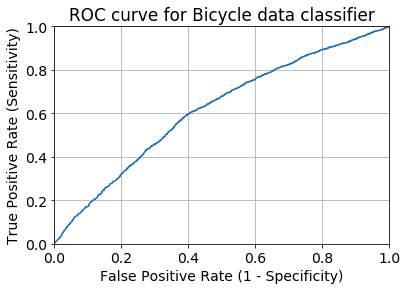

In [64]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Bicycle data classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- ROC curve can help us to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- We can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [65]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [66]:
evaluate_threshold(0.5)

Sensitivity: 0.0
Specificity: 1.0


In [67]:
evaluate_threshold(0.3)

Sensitivity: 0.40167865707434053
Specificity: 0.7407407407407407


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [68]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.6158949383702914


- AUC is useful as a **single number summary** of classifier performance.
- If we randomly chose one positive and one negative observation, AUC represents the likelihood that our classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

In [69]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.6105052136061978

In a ROC curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points of a parameter. ... The area under the ROC curve ( AUC ) is a measure of how well a parameter can distinguish between two diagnostic groups (Risk/Normal).


area under the curve

AUC is an abbrevation for area under the curve. It is used in classification analysis in order to determine which of the used models predicts the classes best. An example of its application are ROC curves. Here, the true positive rates are plotted against false positive rates.

# Model Evaluation Cross Validitain

In [70]:
# define X and y
feature_cols = ["AGE", "EDUCATION","SEX", "MARRIAGE", "LIMIT_BAL"]
y = df.Risk

In [71]:
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class)*100)

77.75999999999999


Text(0,0.5,'True Positive Rate (Sensitivity)')

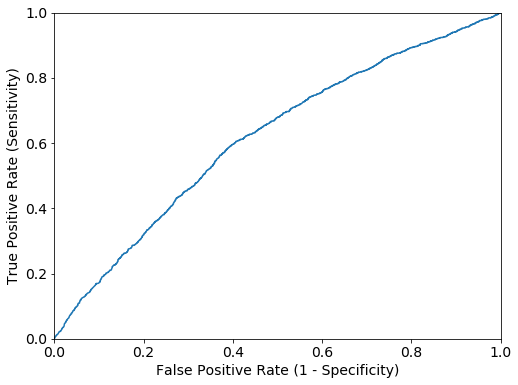

In [72]:
# predict probability of survival
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [73]:
# calculate AUC
print (metrics.roc_auc_score(y_test, y_pred_prob)*100)

61.58949383702914


Besides allowing you to calculate AUC, seeing the ROC curve can help you to choose a threshold that **balances sensitivity and specificity** in a way that makes sense for the particular context.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F285128>,
      dtype=object)

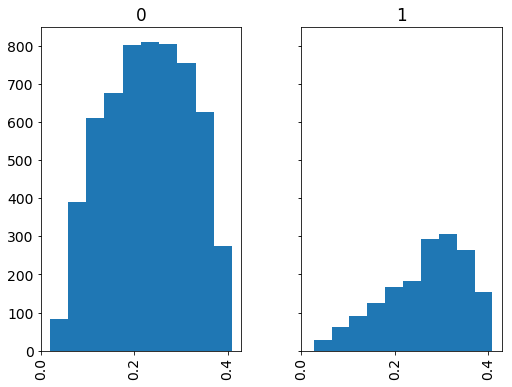

In [74]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

What would have happened if you had used **y_pred_class** instead of **y_pred_prob** when drawing the ROC curve or calculating AUC?

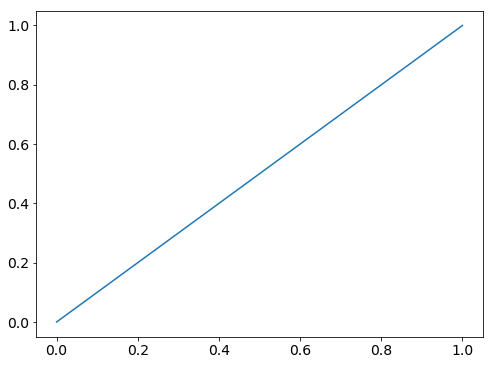

In [75]:
# ROC curve using y_pred_class - WRONG!

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)

plt.plot(fpr, tpr)

In [76]:
# AUC using y_pred_class - WRONG!
print (metrics.roc_auc_score(y_test, y_pred_class)*100)

50.0


If you use **y_pred_class**, it will interpret the zeros and ones as predicted probabilities of 0% and 100%

# Bonus: ROC curve is only sensitive to rank order of predicted probabilities

In [77]:
# print the first 10 predicted probabilities
y_pred_prob[:10]

array([0.14183201, 0.31173954, 0.34515331, 0.24358735, 0.1597162 ,
       0.25868909, 0.22365577, 0.23144185, 0.39542639, 0.17891211])

In [78]:
# take the square root of predicted probabilities (to make them all bigger)
import numpy as np
y_pred_prob_new = np.sqrt(y_pred_prob)

# print the modified predicted probabilities
y_pred_prob_new[:10]

array([0.37660591, 0.55833641, 0.58749749, 0.49354569, 0.3996451 ,
       0.50861488, 0.47292258, 0.48108403, 0.62882938, 0.42298004])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010F2BC18>,
      dtype=object)

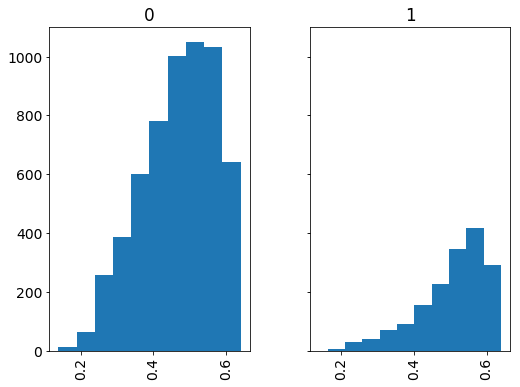

In [79]:
# histogram of predicted probabilities has changed
df = pd.DataFrame({'probability':y_pred_prob_new, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

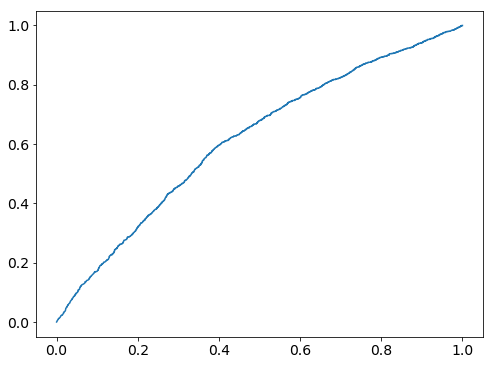

In [80]:
# ROC curve did not change
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_new)
plt.plot(fpr, tpr)

##  Cross-validation

Why cross validation is used?
Cross–validation is a method for testing models and arriving at honest assessments of their performance on future unseen data. Cross–validation is typically used when the training data set is small or when the number of events of interest is small.

In [86]:
df = pd.read_csv("C:/Users/mrferozi/Desktop/Datra Jokes/big/credit/credit_Risk.csv")
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.6105052136061978

In [87]:
# define X and y
feature_cols = ["AGE", "EDUCATION","SEX", "MARRIAGE", "LIMIT_BAL"]
X = df[feature_cols]
y = df.Risk

In [88]:
# recalculate AUC
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.6105052136061978

# Logistict Regression 

## Part 1: Predicting a Continuous Response

**Question:** Pretend that we want to predict **Risk**, and our only feature is **AGE**. How could we do it using machine learning?


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

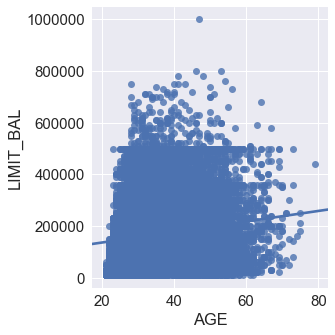

In [112]:
sns.lmplot(x='AGE', y='LIMIT_BAL', data=df, ci=None)

Higher risk found in age between 50 year and 40 year old

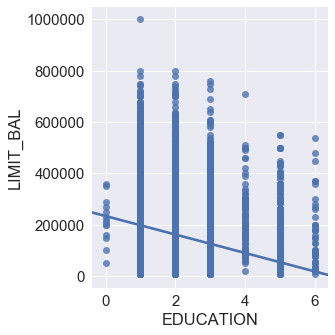

In [113]:
sns.lmplot(x='EDUCATION', y='LIMIT_BAL', data=df, ci=None)

Risk fall between education level 1=graduate school, 2=university, 3=high school, but higher risk found in University level educated people

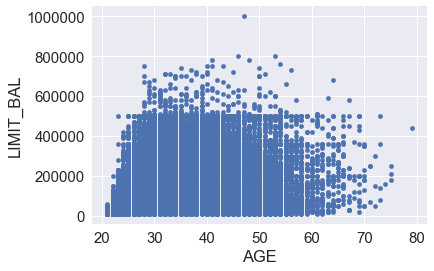

In [111]:
# scatter plot using Pandas
df.plot(kind='scatter', x='AGE', y='LIMIT_BAL')

**Answer:** We could frame it as a regression problem, and use a linear regression model with **AGE** as the only feature and **ri** as the response.

**Question:** How would we **visualize** this model?

**Answer:** Create a scatter plot with **AGE** on the x-axis and **Risk** on the y-axis, and draw the line of best fit.

Text(0,0.5,'LIMIT_BAL')

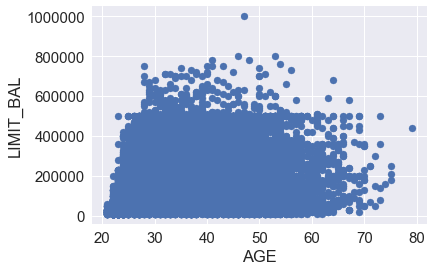

In [114]:
# equivalent scatter plot using Matplotlib
plt.scatter(df.AGE, df.LIMIT_BAL)
plt.xlabel('AGE')
plt.ylabel('LIMIT_BAL')

In [122]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['AGE']
X = df[feature_cols]
y = df.Risk
linreg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
# make predictions for all values of X
df['Risk_pred'] = linreg.predict(X)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Risk,household_pred_risk,Risk_pred
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,0.214017
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0.215267
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0.220271
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0.222147
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0.234656


Text(0,0.5,'Predicted Risk')

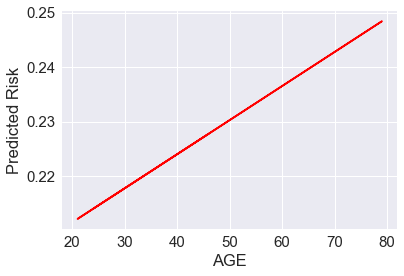

In [124]:
# plot those predictions connected by a line
plt.plot(df.AGE, df.Risk_pred, color='red')
plt.xlabel('AGE')
plt.ylabel('Predicted Risk')

Text(0,0.5,'Risk')

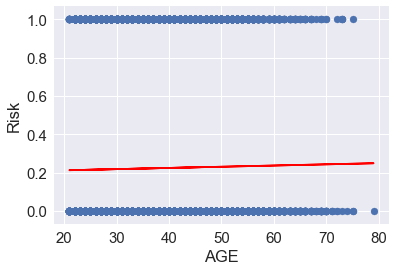

In [125]:
# put the plots together
plt.scatter(df.AGE, df.Risk)
plt.plot(df.AGE, df.Risk_pred, color='red')
plt.xlabel('AGE')
plt.ylabel('Risk')

### Refresher: interpreting linear regression coefficients

Linear regression equation: $y = \beta_0 + \beta_1x$

In [141]:
# compute prediction for AGE==29 using the equation
linreg.intercept_ + linreg.coef_ * 29

array([0.21714378])

In [142]:
# compute prediction for AGE=30 using the predict method
linreg.predict(29)

array([0.21714378])

In [143]:
# examine coefficient for AGE
zip(feature_cols, linreg.coef_)

[('AGE', 0.0006254284773995587)]

**Interpretation:** A 1 unit increase in 'AGE' is associated with a 0.0006 unit increase in 'Risk'.

In [144]:
# increasing AGE by 1 year (so that AGE=30) Increases Risk by 0.0006
0.21714378 + 0.0006254284773995587

0.21776920847739956

In [145]:
# compute prediction for AGE=30 using the predict method
linreg.predict(30)

array([0.21776921])

## Part 2: Predicting a Categorical Response

In [147]:
# examine Risk_type
df.Risk.value_counts().sort_index()

0    23364
1     6636
Name: Risk, dtype: int64

- Where 0 mena no risk and mean default or Risk

In [148]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Risk,household_pred_risk,Risk_pred
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,0.214017
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0.215267
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0.220271
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0.222147
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0.234656


## Part 2: Using Logistic Regression

In [152]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ["AGE", "EDUCATION","SEX", "MARRIAGE", "LIMIT_BAL"]
X = df[feature_cols]
y = df.Risk
logreg.fit(X, y)
df['household_pred_risk'] = logreg.predict(X)

Text(0,0.5,'Predicted Risk')

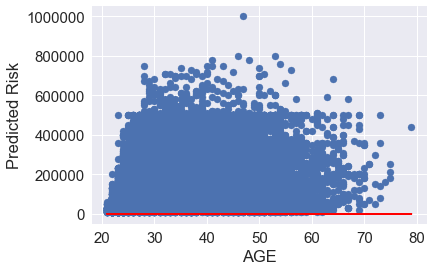

In [153]:
# scatter plot that includes the regression line
plt.scatter(df.AGE, df.LIMIT_BAL)
plt.plot(df.AGE, df.household_pred_risk, color='red')
plt.xlabel('AGE')
plt.ylabel('Predicted Risk')

Text(0,0.5,'Predicted Risk')

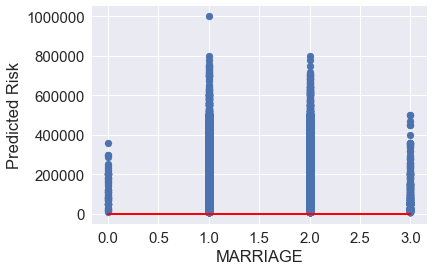

In [154]:
# scatter plot that includes the regression line
plt.scatter(df.MARRIAGE, df.LIMIT_BAL)
plt.plot(df.MARRIAGE, df.household_pred_risk, color='red')
plt.xlabel('MARRIAGE')
plt.ylabel('Predicted Risk')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [155]:
# store the predicted probabilites of class 1
df['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0,0.5,'LIMIT_BAL')

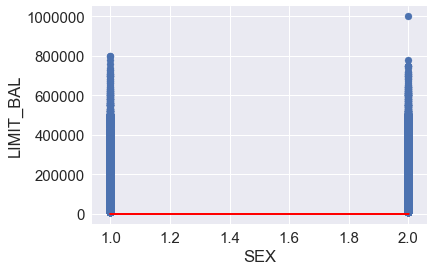

In [159]:
# plot the predicted probabilities
plt.scatter(df.SEX, df.LIMIT_BAL)
plt.plot(df.SEX, df.household_pred_prob, color='red')
plt.xlabel('SEX')
plt.ylabel('LIMIT_BAL')

## Part 3: Interpreting Logistic Regression Coefficients

Text(0,0.5,'LIMIT_BAL')

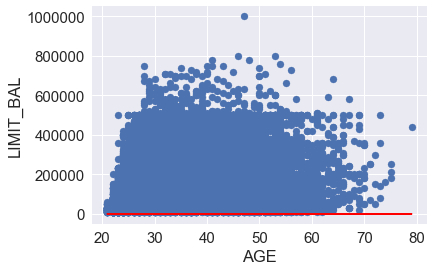

In [164]:
# plot the predicted probabilities again
plt.scatter(df.AGE, df.LIMIT_BAL)
plt.plot(df.AGE, df.household_pred_prob, color='red')
plt.xlabel('AGE')
plt.ylabel('LIMIT_BAL')

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for **binary classification problems** (two response classes). But what about **multi-class classification problems** (more than two response classes)?

- Most common solution for classification models is **"one-vs-all"** (also known as **"one-vs-rest"**): decompose the problem into multiple binary classification problems
- **Multinomial logistic regression** can solve this as a single problem

In [165]:
# compute predicted log-odds for AGE=29 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 29
logodds

array([-0.24840421, -0.01786092, -0.01431498, -0.01534253, -0.00043797])

In [166]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([0.78004458, 0.98229764, 0.985787  , 0.98477456, 0.99956213])

In [167]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.43821632, 0.49553489, 0.49642132, 0.49616444, 0.49989051])

In [172]:
# examine the coefficient for AGE
zip(feature_cols, logreg.coef_[0])

[('AGE', -0.008555914746810337),
 ('EDUCATION', -0.0006061460092435232),
 ('SEX', -0.0004838721839025394),
 ('MARRIAGE', -0.0005193051394389147),
 ('LIMIT_BAL', -5.3547151080149755e-06)]

In [173]:
# examine the intercept
logreg.intercept_

array([-0.00028268])

## Part 4: Using Logistic Regression with Categorical Features

In [174]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Risk,household_pred_risk,Risk_pred,household_pred_prob
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,0,0.214017,0.421793
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0.215267,0.295562
2,3,90000.0,2,2,2,34,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0.220271,0.315112
3,4,50000.0,2,2,1,37,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0.222147,0.357258
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0.234656,0.319098


Logistic regression can still be used with **categorical features**. Let's see what that looks like:

In [179]:
# create a categorical feature
df['high_ba'] = np.where(df.PAY_0 < -1, 1, 0)

Let's use Seaborn to draw the logistic curve:

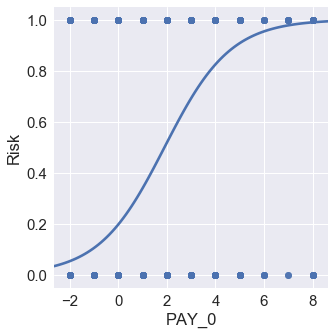

In [184]:
# original (continuous) feature
sns.lmplot(x='PAY_0', y='Risk', data=df, ci=None, logistic=True)

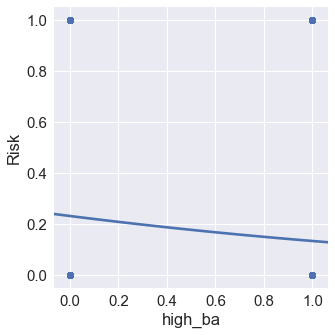

In [183]:
# categorical feature
sns.lmplot(x='high_ba', y='Risk', data=df, ci=None, logistic=True)

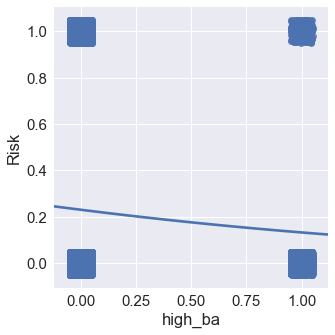

In [182]:
# categorical feature, with jitter added
sns.lmplot(x='high_ba', y='Risk', data=df, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

In [185]:
# fit a logistic regression model
feature_cols = ['high_ba']
X = df[feature_cols]
y = df.Risk
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [186]:
# examine the coefficient for high_ba
zip(feature_cols, logreg.coef_[0])

[('high_ba', -0.6736595652857644)]

**Interpretation:** Having a high 'ba' value is associated with a -0.67 unit decrease in the log-odds of 'Risk' (as compared to a low 'ba' value).

## Resources
References:*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*
- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)